## Armen Khachatrian
### ML for Economics
### Classifications

In [1]:
import pandas as pd
import matplotlib

Answers **FOR *BOTH* SECTIONS**
1. What is the accuracy of a naïve model that would always guess ‘THEFT’ and what is the accuracy of your model?

I calculated accuracy in two ways: Logistic Regression and Random Forest.

The accuracy of a naïve model that would always guess ‘THEFT’ =  0.2230425789010179



Accuracy(RF) = 0.7388

Accuracy(LR) = 0.7806 (after encoding)


2. Are there any other metrics that you have computed to assess the performance of your model? If yes, discuss their values.

I used precison/recall , and MAE,MSE, RMSE

precision score (LR): 0.56

recall score (LR): 0.32

Mean Absolute Error (LR): 0.21939571787706888

Mean Squared Error (LR): 0.21939571787706888

Root Mean Squared Error (LR): 0.468396966127097

precision score (RF): 0.42

recall score (RF): 0.29

Mean Absolute Error (RF): 0.26118893862788894

Mean Squared Error (RF): 0.26118893862788894

Root Mean Squared Error (RF): 0.5110664718291437

Here we can see the both types of metrics reflect the accuracy difference between two models. Precison (LR) is more than half, what means that model selected almost the half of relevant values. Recall which is related to how many relevant values are selected has poor rate. MSE (0.21.. and 0.26.. respectively) is high enough.

3. What approach did you use and why?

I used Random Forest because this method is easy to use with binory classification. Also I used Logistic Regression  to compare accuracy. Logistic Regression and Random Forest are well-used for classification problems

4. How would you improve your model if you had another hour / another week at your disposal?

1) For Binary Classification:

I should use transform and aggregative primitives. Some of them I used: Minute, Hour, Day, Month. But, unfortunately, I could not do "time_since_previous" (transform) and "avg_time_between" (aggregative), which will be beneficial for sure. I faced troubles with using dfs method and I should spend more time on it as before I once used this method but I had more than one entity and I had target entity.

2) For Multiclass Classification:

I tried to measure all 32 types of crime. Of course, it is impossible to get high accuracy due to the fact that some of them happened rarely. I should do feature matrix and calculate the importance of them. Unfortunately, I had the lack of time to do it.

## Binary Classification

In [2]:
data = pd.read_csv("chicago_crimes_data_2010_2017.csv")
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,2012-11-22 11:00:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25.0,36.0,18.0,14,41.923153,-87.802559,2012,train
1,720647,8417624,HT650924,2011-12-28 21:17:00,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5.0,34.0,53.0,15,41.679787,-87.627957,2011,train
2,32037,7348669,HS150223,2010-02-03 21:40:00,026XX W 24TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10.0,28.0,30.0,08B,41.848314,-87.691627,2010,train
3,532182,8124889,HT358665,2011-06-21 13:10:00,017XX W PRYOR AVE,0320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22.0,19.0,75.0,03,41.692042,-87.665924,2011,train
4,2420587,11164022,JA530938,2017-11-30 11:45:00,031XX W DIVERSEY AVE,0325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,1411,14.0,35.0,21.0,03,41.932040,-87.705287,2017,test


In [3]:
k = 0
for i in range(len(data['train_or_test'])):
    if data['train_or_test'][i] == "train":
        k += 1
print(k) #how many train rows we have

381267


In [4]:
import matplotlib.pyplot as plt
plt.scatter(data['Latitude'], data['Longitude'], color='green', marker='o')
plt.show() #We see outliers

<Figure size 640x480 with 1 Axes>

In [5]:
import numpy as np
outliers_index = []
for i in np.arange(len(data)):
    if data['Latitude'][i] < 41:
        outliers_index.append(data.index[i])

In [6]:
data.drop(outliers_index, inplace=True) #drop outliers

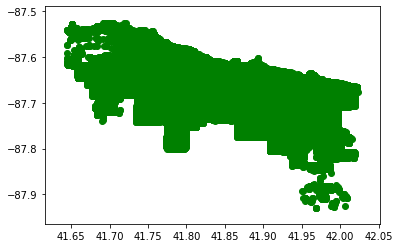

In [7]:
plt.scatter(data['Latitude'], data['Longitude'], color='green', marker='o')
plt.show() #by longitude and latitude other points are in Chicago location

In [8]:
data['Primary Type'].value_counts()

THEFT                                108897
BATTERY                               87646
CRIMINAL DAMAGE                       52184
NARCOTICS                             45602
ASSAULT                               30469
BURGLARY                              29740
OTHER OFFENSE                         29195
DECEPTIVE PRACTICE                    24016
MOTOR VEHICLE THEFT                   22277
ROBBERY                               19357
CRIMINAL TRESPASS                     12450
WEAPONS VIOLATION                      5860
PUBLIC PEACE VIOLATION                 4189
OFFENSE INVOLVING CHILDREN             3722
PROSTITUTION                           2720
CRIM SEXUAL ASSAULT                    2277
INTERFERENCE WITH PUBLIC OFFICER       1777
SEX OFFENSE                            1660
GAMBLING                                855
HOMICIDE                                824
ARSON                                   729
LIQUOR LAW VIOLATION                    719
KIDNAPPING                      

In [9]:
q = 108897 # number of THEFT

In [10]:
naive_acc = q/len(data['Primary Type'])
print("The accuracy of a naïve model that would always guess ‘THEFT’ = ", naive_acc)

The accuracy of a naïve model that would always guess ‘THEFT’ =  0.22304355306493634


In [11]:
data.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
Latitude                float64
Longitude               float64
Year                      int64
train_or_test            object
dtype: object

In [12]:
#Adjust our features
data["Date"] = pd.to_datetime(data["Date"])
data["Minute"] = data.Date.dt.minute
data["Hour"] = data.Date.dt.hour
data["Day"] = data.Date.dt.day
data["Month"] = data.Date.dt.month

In [13]:
print("Date : ",data['Date'].unique()) 
print("Block : ",data['Block'].unique())
print("Description : ",data['Description'].unique())
print("Latitude : ",data['Latitude'].unique())
print("Longitude : ",data['Longitude'].unique())
print("Location Description: ",data['Location Description'].unique())
print("Beat : ",data['Beat'].unique())
print("District : ",data['District'].unique())
print("Ward : ",data['Ward'].unique())
print("Community Area : ",data['Community Area'].unique())
print("Year : ",data['Year'].unique())

Date :  ['2012-11-22T11:00:00.000000000' '2011-12-28T21:17:00.000000000'
 '2010-02-03T21:40:00.000000000' ... '2011-12-05T20:25:00.000000000'
 '2017-05-21T14:50:00.000000000' '2012-01-28T18:50:00.000000000']
Block :  ['023XX N NORDICA AVE' '002XX W 118TH ST' '026XX W 24TH ST' ...
 '040XX W SCHUBERT AVE' '067XX N LEHIGH AVE' '072XX W IBSEN ST']
Description :  ['TO VEHICLE' 'UNLAWFUL POSS OF HANDGUN' 'DOMESTIC BATTERY SIMPLE'
 'STRONGARM - NO WEAPON' 'VEHICULAR HIJACKING' 'OVER $500'
 'FORCIBLE ENTRY' 'AUTOMOBILE' 'TO PROPERTY' 'FROM BUILDING'
 'OTHER OFFENSE' '$500 AND UNDER' 'AGGRAVATED: HANDGUN' 'RETAIL THEFT'
 'AGG PO HANDS NO/MIN INJURY' 'SIMPLE' 'POSS: SYNTHETIC DRUGS'
 'MANU/DEL:CANNABIS OVER 10 GMS' 'SEX OFFENDER: FAIL TO REGISTER'
 'AGGRAVATED: OTHER DANG WEAPON' 'HARASSMENT BY ELECTRONIC MEANS'
 'ATTEMPT FORCIBLE ENTRY' 'PURSE-SNATCHING'
 'FINANCIAL IDENTITY THEFT OVER $ 300' 'OTHER VEHICLE OFFENSE' 'TO LAND'
 'THEFT/RECOVERY: AUTOMOBILE' 'AGGRAVATED' 'MANU/DELIVER: HEROIN (WHI

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#Adjusting other features
data['Description'] = le.fit_transform(data['Description'])
data['Block'] = le.fit_transform(data['Block'])
data['District'] = le.fit_transform(data['District'])
data['Ward'] = le.fit_transform(data['Ward'])
data['Community Area'] = le.fit_transform(data['Community Area'])
data['Latitude'] = le.fit_transform(data['Latitude'])
data['Longitude'] = le.fit_transform(data['Longitude'])

data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test,Minute,Hour,Day,Month
0,1027327,8899599,HV573490,2012-11-22 11:00:00,9922,1320,CRIMINAL DAMAGE,291,PARKING LOT/GARAGE(NON.RESID.),False,...,18,14,164147,2842,2012,train,0,11,22,11
1,720647,8417624,HT650924,2011-12-28 21:17:00,1357,143A,WEAPONS VIOLATION,298,SIDEWALK,True,...,53,15,4304,167430,2011,train,17,21,28,12
2,32037,7348669,HS150223,2010-02-03 21:40:00,11222,0486,BATTERY,113,RESIDENCE,False,...,30,08B,103279,86477,2010,train,40,21,3,2
3,532182,8124889,HT358665,2011-06-21 13:10:00,7806,0320,ROBBERY,273,CTA BUS,False,...,75,03,8662,118740,2011,train,10,13,21,6
4,2420587,11164022,JA530938,2017-11-30 11:45:00,13206,0325,ROBBERY,312,STREET,False,...,21,03,171072,70149,2017,test,45,11,30,11


In [15]:
d1 = data.loc[data['Primary Type'] == "THEFT"]
d1["Binary Type"] = 1 # adding binory values for crimes

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
d2 = data.loc[data['Primary Type'] != "THEFT"]
d2["Binary Type"] = 0

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
data = pd.concat([d1, d2], axis=0)

In [18]:
data_train = data.loc[data['train_or_test']== 'train'][:]
data_train

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,Latitude,Longitude,Year,train_or_test,Minute,Hour,Day,Month,Binary Type
5,1245448,9301182,HW445774,2013-08-05 12:00:00,15503,0810,THEFT,212,OTHER,False,...,06,185484,135591,2013,train,0,12,5,8,1
9,90734,7439846,HS242094,2010-04-04 20:45:00,25193,0890,THEFT,138,NURSING HOME/RETIREMENT HOME,False,...,06,210554,105070,2010,train,45,20,4,4,1
12,1079376,8983821,HW130715,2013-01-24 20:40:00,20365,0820,THEFT,0,STREET,True,...,06,200537,4474,2013,train,40,20,24,1,1
15,1361980,9437742,HW581784,2013-12-23 13:40:00,20535,0860,THEFT,253,SMALL RETAIL STORE,True,...,06,79826,164727,2013,train,40,13,23,12,1
16,1493294,9663883,HX314081,2014-06-22 12:00:00,21868,0820,THEFT,0,RESIDENCE,False,...,06,202990,53025,2014,train,0,12,22,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488263,700830,8386347,HT619658,2011-12-05 20:25:00,11046,1150,DECEPTIVE PRACTICE,99,DEPARTMENT STORE,False,...,11,169205,95664,2011,train,25,20,5,12,0
488264,1092215,9011951,HW150989,2013-02-10 01:05:00,27355,0460,BATTERY,266,RESIDENCE,False,...,08B,23800,153759,2013,train,5,1,10,2,0
488265,380391,7884014,HT114593,2011-01-11 10:10:00,20144,0460,BATTERY,266,STREET,False,...,08B,80469,118813,2011,train,10,10,11,1,0
488266,346903,7834202,HS642299,2010-12-02 10:50:00,24241,0430,BATTERY,34,APARTMENT,False,...,04B,57162,172702,2010,train,50,10,2,12,0


In [19]:
data_test = data.loc[data['train_or_test']== 'test'][:]
data_test

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,Latitude,Longitude,Year,train_or_test,Minute,Hour,Day,Month,Binary Type
50,1966665,10470274,HZ209113,2016-03-30 06:00:00,10738,0820,THEFT,0,RESIDENTIAL YARD (FRONT/BACK),False,...,06,101932,73445,2016,test,0,6,30,3,1
63,2042038,10590880,HZ341922,2016-07-07 15:30:00,16952,0820,THEFT,0,RESIDENCE,False,...,06,190274,115809,2016,test,30,15,7,7,1
75,2301153,10994261,JA321566,2017-06-25 03:15:00,23332,0860,THEFT,253,SMALL RETAIL STORE,False,...,06,206452,127771,2017,test,15,3,25,6,1
80,2393316,11126753,JA482123,2017-10-22 16:00:00,2944,0820,THEFT,0,STREET,False,...,06,137463,140207,2017,test,0,16,22,10,1
84,2033844,10577075,HZ325776,2016-06-27 15:15:00,22737,0820,THEFT,0,DEPARTMENT STORE,True,...,06,204954,58332,2016,test,15,15,27,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488252,2390772,11123378,JA477316,2017-10-19 13:25:00,18555,051A,ASSAULT,31,STREET,False,...,04A,87304,182448,2017,test,25,13,19,10,0
488254,2067766,10630947,HZ383943,2016-08-08 19:05:00,5731,2017,NARCOTICS,185,STREET,True,...,18,150620,155251,2016,test,5,19,8,8,0
488255,2184883,10816200,JA116062,2017-01-14 16:01:00,13083,1305,CRIMINAL DAMAGE,101,GAS STATION,False,...,14,99190,172693,2017,test,1,16,14,1,0
488256,2139983,10747402,HZ508730,2016-11-09 12:45:00,2341,0470,PUBLIC PEACE VIOLATION,249,STREET,True,...,24,173798,154381,2016,test,45,12,9,11,0


In [20]:
#All unnecessary features are deleted
del data_train['Date']
del data_train['Unnamed: 0']
del data_train['ID']
del data_train['Case Number']
del data_train['IUCR']
del data_train['Primary Type']
del data_train['Description']
del data_train['Arrest']
del data_train['Domestic']
del data_train['FBI Code']
del data_train['train_or_test']
del data_train['Location Description']

del data_test['Date']
del data_test['Unnamed: 0']
del data_test['ID']
del data_test['Case Number']
del data_test['IUCR']
del data_test['Primary Type']
del data_test['Description']
del data_test['Arrest']
del data_test['Domestic']
del data_test['FBI Code']
del data_test['train_or_test']
del data_test['Location Description']

In [21]:
y_train = data_train["Binary Type"]
X_train = data_train[["Block", "Beat", "District", "Ward", "Community Area", 
                     "Year", "Minute", "Hour", "Day", "Month"]]
y_test = data_test["Binary Type"]
X_test = data_test[["Block", "Beat", "District", "Ward", "Community Area", 
                     "Year", "Minute", "Hour", "Day", "Month"]]

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.7639

In [23]:
LR.predict(X_test).sum() #All predictions are 0 in LR model

0

In [24]:
#Encode our data
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)
X_train_one_hot = enc.transform(X_train)
X_test_one_hot = enc.transform(X_test)

In [25]:
LR3 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_one_hot, y_train)
LR3.predict(X_test_one_hot)
round(LR3.score(X_test_one_hot,y_test), 4)

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7806

In [26]:
LR3.predict(X_test_one_hot).sum() #we have predictions!

14460

In [27]:
y_score = LR3.predict(X_test_one_hot) 

In [28]:
from sklearn.metrics import precision_score
precision_LR = precision_score(y_test, y_score)
print('precision score (LR): {0:0.2f}'.format(precision_LR))

precision score (LR): 0.56


In [29]:
from sklearn.metrics import recall_score
recall_LR = recall_score(y_test, y_score)
print('recall score (LR): {0:0.2f}'.format(recall_LR))

recall score (LR): 0.32


In [30]:
from sklearn import metrics
print('Mean Absolute Error (LR):', metrics.mean_absolute_error(y_test, y_score))
print('Mean Squared Error (LR):', metrics.mean_squared_error(y_test, y_score))
print('Root Mean Squared Error (LR):', np.sqrt(metrics.mean_squared_error(y_test, y_score)))

Mean Absolute Error (LR): 0.21939571787706888
Mean Squared Error (LR): 0.21939571787706888
Root Mean Squared Error (LR): 0.468396966127097


In [31]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
forest.fit(X_train, y_train)
scored_y = forest.predict(X_test)
round(forest.score(X_test, y_test), 4)

0.7388

In [32]:
precision_RF = precision_score(y_test, scored_y)
print('precision score (RF): {0:0.2f}'.format(precision_RF))

precision score (RF): 0.42


In [33]:
recall_RF = recall_score(y_test, scored_y)
print('recall score (RF): {0:0.2f}'.format(recall_RF))

recall score (RF): 0.29


In [34]:
print('Mean Absolute Error (RF):', metrics.mean_absolute_error(y_test, scored_y))
print('Mean Squared Error (RF):', metrics.mean_squared_error(y_test, scored_y))
print('Root Mean Squared Error (RF):', np.sqrt(metrics.mean_squared_error(y_test, scored_y)))

Mean Absolute Error (RF): 0.26118893862788894
Mean Squared Error (RF): 0.26118893862788894
Root Mean Squared Error (RF): 0.5110664718291437


## Multiclass classification

In [35]:
data['Primary Type'] = le.fit_transform(data['Primary Type'])
del data['Binary Type']

In [36]:
data_train = data.loc[data['train_or_test']== 'train'][:]
data_test = data.loc[data['train_or_test']== 'test'][:]

In [37]:
del data_train['Date']
del data_train['Unnamed: 0']
del data_train['ID']
del data_train['Case Number']
del data_train['IUCR']
del data_train['Description']
del data_train['Arrest']
del data_train['Domestic']
del data_train['FBI Code']
del data_train['train_or_test']
del data_train['Location Description']

del data_test['Date']
del data_test['Unnamed: 0']
del data_test['ID']
del data_test['Case Number']
del data_test['IUCR']
del data_test['Description']
del data_test['Arrest']
del data_test['Domestic']
del data_test['FBI Code']
del data_test['train_or_test']
del data_test['Location Description']

In [38]:
y_train = data_train["Primary Type"]
X_train = data_train[["Block", "Beat", "District", "Ward", "Community Area", "Latitude", "Longitude", 
                     "Year", "Minute", "Hour", "Day", "Month"]]
y_test = data_test["Primary Type"]
X_test = data_test[["Block", "Beat", "District", "Ward", "Community Area", "Latitude", "Longitude", 
                     "Year", "Minute", "Hour", "Day", "Month"]]

In [39]:
#import numpy as np
#y_train = np.log(y_train + 1) 
#y_test = np.log(y_test + 1)

In [40]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)
X_train_one_hot = enc.transform(X_train)
X_test_one_hot = enc.transform(X_test)

In [41]:
import numpy as np
random_state = np.random.RandomState(0)
LR = LogisticRegression(random_state=random_state, solver='lbfgs', multi_class='multinomial').fit(
    X_train_one_hot, y_train)
y_pred = LR.predict(X_test_one_hot)
round(LR.score(X_test_one_hot,y_test), 4)

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.2901

In [42]:
LR.predict(X_test_one_hot)

array([16, 31, 31, ...,  8, 31, 27])

In [43]:
print('Mean Absolute Error (LR):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (LR):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (LR):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (LR): 11.231984149977103
Mean Squared Error (LR): 247.6575423118978
Root Mean Squared Error (LR): 15.737138949373797


In [44]:
#forest = RandomForestClassifier(criterion='gini',
 #                                n_estimators=8,
 #                                random_state=1,
 #                                n_jobs=2)
#forest.fit(X_train, y_train)
#y_pred = forest.predict(X_test)
#round(forest.score(X_test, y_test), 4)

In [45]:
#print('Mean Absolute Error (RF):', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error (RF):', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error (RF):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [46]:
#precision_RF = precision_score(y_test, y_pred)
#recall_RF = recall_score(y_test, y_pred)
#
#print('precision score (RF): {0:0.2f}'.format(precision_RF))
#print('recall score (RF): {0:0.2f}'.format(recall_RF))

In [47]:
#LR1 = LogisticRegression(random_state=random_state, solver='sag', multi_class='multinomial').fit(X_train, y_train)
#LR1.predict(X_test)
#round(LR1.score(X_test,y_test), 4)

In [48]:
#IMPORTANCE
#feature_importances(model, feature_matrix.columns, n=25)